# Credit Card Fraud Detection Model
Tom Kasimov, Joshua Chen, Ismael Ponce, Alex Edwards, Ben Glassmire

## Preperation: Import dataset and examine dataset

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score

In [73]:

fraud = pd.read_csv('creditcard.csv')

In [29]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [74]:
#Normalization
fraud['Amount']=(fraud['Amount']-fraud['Amount'].mean())/fraud['Amount'].std()

In [78]:
fraud = fraud.drop(['Time'], axis =1)

In [79]:
X = fraud.drop(['Class'], axis =1)

In [80]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342474
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160684
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350150
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254116
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313248


In [81]:
y = fraud['Class']

In [82]:
train, test = train_test_split(fraud, test_size = 0.3, random_state = 42)

In [138]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

## Model Training: train logistic model on training dataset and predict on testing dataset

#### Logistic Model #1

In [151]:
logit_regression = smf.logit("Class ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10 + V11 + V12 + V13 + V14 + V15 + V16 + V17 + V18 + V19 + V20 + V21 + V22 + V23 + V24 + V25 + V26 + V27 + V28 + Amount", data = train)
logit_results = logit_regression.fit()
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.004117
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               199364
Model:                          Logit   Df Residuals:                   199334
Method:                           MLE   Df Model:                           29
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                  0.6853
Time:                        22:53:37   Log-Likelihood:                -820.83
converged:                       True   LL-Null:                       -2608.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.5538      0.164    -52.000      0.000      -8.876      -8.231
V1             0.0891      0

In [152]:
# Predict probability of fraud in the trainning set
# use 0.5 as threshold to classify fraud transactions or not
# save the predictions back to train
train['PredictedFraud'] = (logit_results.predict() > 0.5).astype(int)

In [86]:
cm = confusion_matrix(train['Class'], train['PredictedFraud'])
cm

array([[198979,     29],
       [   136,    220]])

In [87]:
recall = 220 / (220 + 136)
precision = 220 / (220 + 29)
print("baseline recall is", recall)
print("baseline precision is", precision)
print(classification_report(train['Class'], train['PredictedFraud']))

baseline recall is 0.6179775280898876
baseline precision is 0.8835341365461847
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       0.88      0.62      0.73       356

    accuracy                           1.00    199364
   macro avg       0.94      0.81      0.86    199364
weighted avg       1.00      1.00      1.00    199364



#### Prediction using Test set

In [153]:
#Prediction
test['PredictedFraud'] = (logit_results.predict(test) > 0.5).astype(int)

#### Model Evaluations: Recall, Precision, F1, AUC

In [89]:
#Confusion Matrix
cm_t = confusion_matrix(test['Class'], test['PredictedFraud'])
cm_t

array([[85295,    12],
       [   51,    85]])

In [90]:
print(classification_report(test['Class'], test['PredictedFraud']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.62      0.73       136

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [92]:
#Recall
recall = 85 / (85 + 51)
print(recall)
#Precision
precision = 85 / (12 + 85)
print(precision)
#F1
f1 = (2 * recall * precision) / (precision + recall)
print(f1)

0.625
0.8762886597938144
0.7296137339055795


In [93]:
#Average Precision Score
auprc_logit = average_precision_score(test['Class'], test['PredictedFraud'])
auprc_logit

0.5482773015253071

In [154]:
test['Class_prob'] = logit_results.predict(test)

In [155]:
y_true = test['Class'].values
y_scores = test['Class_prob'].values

In [156]:
fpr, tpr, threholds = roc_curve(y_true=y_true, y_score=y_scores)
auc=roc_auc_score(y_true, y_scores)
auc

0.9802674630521322

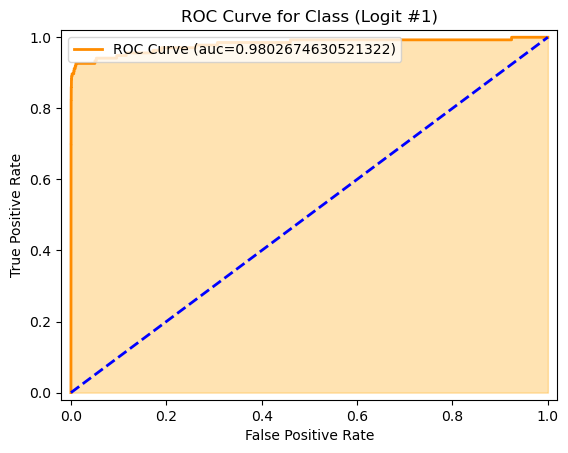

In [157]:
#Now we can use the calculated fpr tpr to construct the ROC plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (auc={auc})')
plt.fill_between(fpr, tpr, color='orange', alpha=0.3)  # Highlighting the area under the curve
plt.plot([0,1], [0,1], color='blue', lw=2, linestyle='--') # Baseline line
# Setting x,y borders
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
#Adding labels and notations
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class (Logit #1)')
plt.legend(loc='upper left')
plt.show()

#### Logistic Model #2

In [102]:
logit_regression_test = smf.logit("Class ~ V1 + V4 + V6 + V7 + V8 + V10 + V13 + V14 + V16 + V19 + V20 + V21 + V22 + V27 + V28 + Amount", data = train)
logit_results_test = logit_regression_test.fit()
print(logit_results_test.summary())

Optimization terminated successfully.
         Current function value: 0.004149
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               199364
Model:                          Logit   Df Residuals:                   199347
Method:                           MLE   Df Model:                           16
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                  0.6829
Time:                        17:03:38   Log-Likelihood:                -827.19
converged:                       True   LL-Null:                       -2608.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.5632      0.151    -56.534      0.000      -8.860      -8.266
V1             0.1038      0

In [104]:
#Prediction
test['PredictedFraud'] = (logit_results_test.predict(test) > 0.5).astype(int)

#### Model Evaluations: Recall, Precision, F1, AUC

In [106]:
#Confusion Matrix
cm_t = confusion_matrix(test['Class'], test['PredictedFraud'])
print(cm_t)


[[85293    14]
 [   49    87]]


In [107]:
#Recall
recall = 87 / (87 + 49)
print(recall)
#Precision
precision = 87 / (14 + 87)
print(precision)
#F1
f1 = (2 * recall * precision) / (precision + recall)
print(f1)

0.6397058823529411
0.8613861386138614
0.7341772151898734


In [109]:
#Average Precision Score
auprc_logit_test = average_precision_score(test['Class'], test['PredictedFraud'])
print(auprc_logit_test)

0.5516072615849353


In [111]:
test['Class_prob'] = logit_results_test.predict(test)
y_true = test['Class'].values
y_scores = test['Class_prob'].values
fpr, tpr, threholds = roc_curve(y_true=y_true, y_score=y_scores)
auc=roc_auc_score(y_true, y_scores)
auc

0.9812130960910043

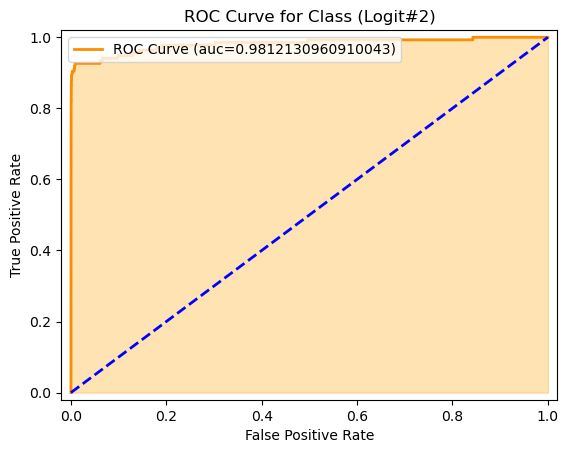

In [148]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (auc={auc})')
plt.fill_between(fpr, tpr, color='orange', alpha=0.3)  # Highlighting the area under the curve
plt.plot([0,1], [0,1], color='blue', lw=2, linestyle='--') # Baseline line
# Setting x,y borders
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
#Adding labels and notations
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class (Logit#2)')
plt.legend(loc='upper left')
plt.show()

### CART Model

In [113]:
dt_10=DecisionTreeClassifier(min_samples_leaf=10)
dt_10.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10)

In [114]:
dt_50=DecisionTreeClassifier(min_samples_leaf=50)
dt_50.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=50)

In [115]:
dt_100=DecisionTreeClassifier(min_samples_leaf=100)
dt_100.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=100)

In [116]:
y_pred_10=dt_10.predict(x_test)
auprc_CART_10 = average_precision_score(test['Class'], y_pred_10)
auprc_CART_10

0.7120690023138921

In [119]:
cm_10=confusion_matrix(test['Class'], y_pred_10)
cm_10

array([[85292,    15],
       [   26,   110]])

In [120]:
y_pred_50=dt_50.predict(x_test)
auprc_CART_50 = average_precision_score(test['Class'], y_pred_50)
auprc_CART_50

0.5200177923516316

In [122]:
cm_50=confusion_matrix(test['Class'], y_pred_50)
cm_50

array([[85256,    51],
       [   31,   105]])

In [123]:
y_pred_100=dt_100.predict(x_test)
auprc_CART_100 = average_precision_score(test['Class'], y_pred_100)
auprc_CART_100

0.5226517073062243

In [124]:
cm_100=confusion_matrix(test['Class'], y_pred_100)
cm_100

array([[85268,    39],
       [   37,    99]])

CART model setting min_samples_leaf at 10 has the highest precision score.

In [144]:
y_pred_proba_10 = dt_10.predict_proba(x_test)[:, 1]
auc_10 = roc_auc_score(y_test, y_pred_proba_10)
auc_10

0.9409223279380562

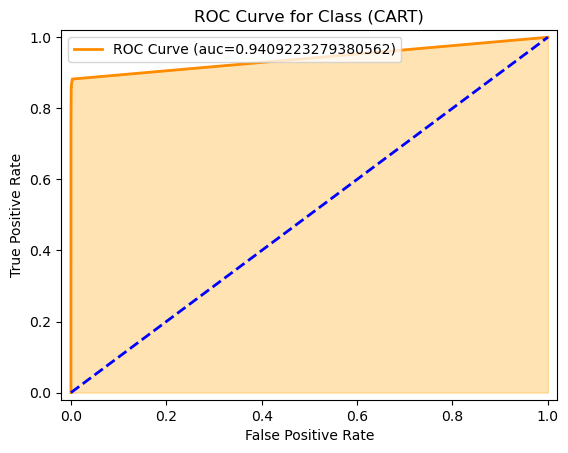

In [158]:
fpr_10, tpr_10, thresholds_10 = roc_curve(y_test, y_pred_proba_10)
plt.figure()
plt.plot(fpr_10, tpr_10, color='darkorange', lw=2, label=f'ROC Curve (auc={auc_10})')
plt.fill_between(fpr_10, tpr_10, color='orange', alpha=0.3)  # Highlighting the area under the curve
plt.plot([0,1], [0,1], color='blue', lw=2, linestyle='--') # Baseline line
# Setting x,y borders
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
#Adding labels and notations
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class (CART)')
plt.legend(loc='upper left')
plt.show()

### Random Forest

In [ ]:
creditcard_rf = RandomForestClassifier(n_estimators = 100, min_samples_leaf= 40, random_state = 42)
creditcard_rf_res = creditcard_rf.fit(x_train, y_train)
y_pred_rf = creditcard_rf_res.predict(x_test)

In [126]:
auprc_rf = average_precision_score(test['Class'], y_pred_rf)
auprc_rf

0.5327223057899638

In [127]:
cm_rf=confusion_matrix(test['Class'], y_pred_rf)
cm_rf

array([[85288,    19],
       [   48,    88]])

In [128]:
#Recall
recall = 88 / (87 + 48)
print(recall)
#Precision
precision = 88 / (19 + 88)
print(precision)
#F1
f1 = (2 * recall * precision) / (precision + recall)
print(f1)

0.6518518518518519
0.822429906542056
0.7272727272727273


[Text(0.20386866519325658, 0.975, 'x[16] <= -2.769\ngini = 0.004\nsamples = 199364\nvalue = [199008, 356]'),
 Text(0.1368421052631579, 0.925, 'x[9] <= 2.217\ngini = 0.337\nsamples = 303\nvalue = [65, 238]'),
 Text(0.12631578947368421, 0.875, 'x[13] <= -2.793\ngini = 0.283\nsamples = 287\nvalue = [49, 238]'),
 Text(0.11578947368421053, 0.825, 'x[26] <= 1.694\ngini = 0.237\nsamples = 270\nvalue = [37, 233]'),
 Text(0.08421052631578947, 0.775, 'x[13] <= -3.914\ngini = 0.157\nsamples = 233\nvalue = [20, 213]'),
 Text(0.05263157894736842, 0.725, 'x[14] <= 0.933\ngini = 0.109\nsamples = 207\nvalue = [12, 195]'),
 Text(0.021052631578947368, 0.675, 'x[3] <= 1.724\ngini = 0.046\nsamples = 168\nvalue = [4, 164]'),
 Text(0.010526315789473684, 0.625, 'gini = 0.266\nsamples = 19\nvalue = [3, 16]'),
 Text(0.031578947368421054, 0.625, 'x[27] <= 0.727\ngini = 0.013\nsamples = 149\nvalue = [1, 148]'),
 Text(0.021052631578947368, 0.575, 'gini = 0.0\nsamples = 138\nvalue = [0, 138]'),
 Text(0.04210526315

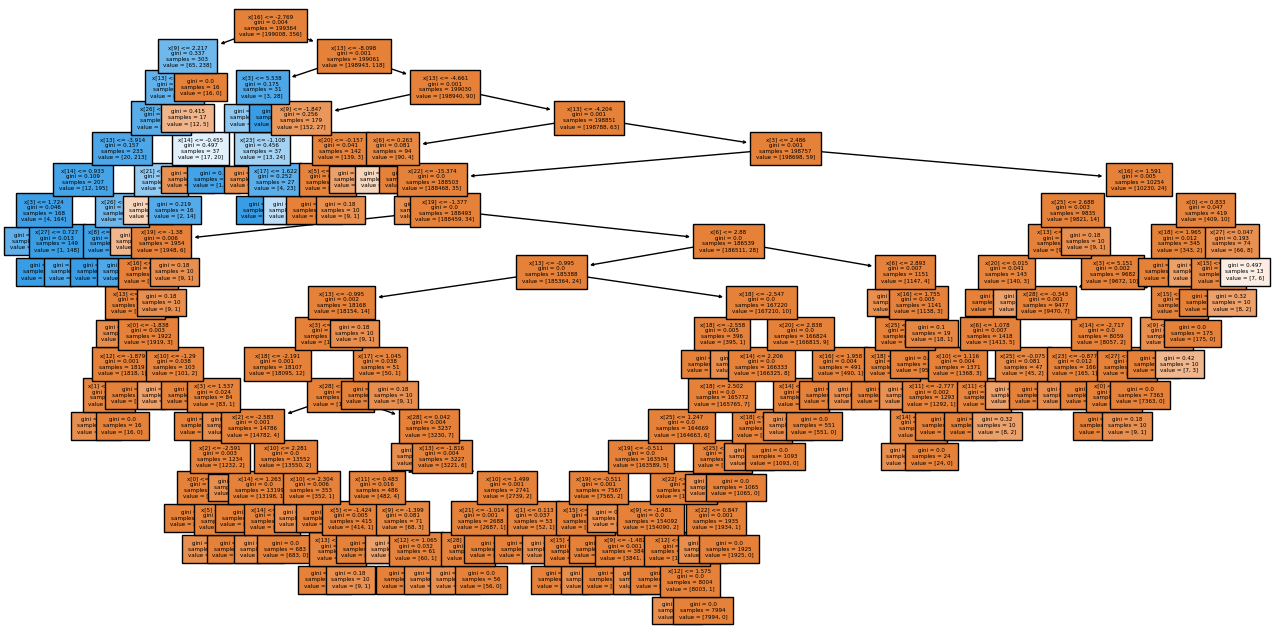

In [65]:
plt.figure(figsize = (16,8))
plot_tree(dt_10, fontsize = 4,  filled = True)

In [146]:
y_pred_proba_rf = creditcard_rf.predict_proba(x_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
auc_rf

0.9822224264059427

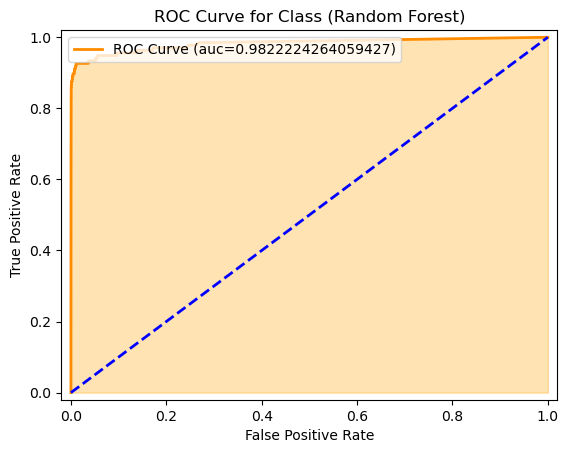

In [159]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC Curve (auc={auc_rf})')
plt.fill_between(fpr_rf, tpr_rf, color='orange', alpha=0.3)  # Highlighting the area under the curve
plt.plot([0,1], [0,1], color='blue', lw=2, linestyle='--') # Baseline line
# Setting x,y borders
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
#Adding labels and notations
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class (Random Forest)')
plt.legend(loc='upper left')
plt.show()